In [295]:
import os
os.chdir("C:\\Users\\bizet\\Desktop\\Kaggle Challenge")
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import random
from random import randint
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from sklearn.linear_model import LogisticRegression

# Train Data

In [296]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [297]:
count_nan = len(df) - df.count()
count_nan

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Cleaning data

In [298]:
df.drop('Cabin', 1, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


### Cleaning Age and insert random numbers to missing values

In [299]:
mean = int(round(df['Age'].mean()))
sd = int(round(df['Age'].std()))
df["Age"].fillna(randint(mean - sd, mean + sd), inplace=True)

#determine correlations between age and survival by groupe
df['Agegroupe'] = pd.cut(df['Age'], 5)
df[['Agegroupe','Survived']].groupby(['Agegroupe'], as_index=False).mean().sort_values(by='Agegroupe',ascending=True)

,Agegroupe,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.350685
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [300]:
df.loc[ df['Age'] <= 16, "Age"] = 0
df.loc[ (df['Age'] > 16) & (df['Age'] <= 32) , "Age"] = 1
df.loc[ (df['Age'] > 32) & (df['Age'] <= 48) , "Age"] = 2
df.loc[ (df['Age'] > 48) & (df['Age'] <= 64) , "Age"] = 3
df.loc[ df['Age'] > 64, "Age"] = 4
df['Age'] = df["Age"].astype(int)
df['Age']

0      1
1      2
2      1
3      2
4      2
5      2
6      3
7      0
8      1
9      0
10     0
11     3
12     1
13     2
14     0
15     3
16     0
17     2
18     1
19     2
20     2
21     2
22     0
23     1
24     0
25     2
26     2
27     1
28     2
29     2
      ..
861    1
862    2
863    2
864    1
865    2
866    1
867    1
868    2
869    0
870    1
871    2
872    2
873    2
874    1
875    0
876    1
877    1
878    2
879    3
880    1
881    2
882    1
883    1
884    1
885    2
886    1
887    1
888    2
889    1
890    1
Name: Age, Length: 891, dtype: int32

## Creating Family Size

In [301]:
df["Fsize"] = df["SibSp"] + df["Parch"] 
df["Fsize"].loc[df["Fsize"] > 0] = 1
df["Fsize"].loc[df["Fsize"] == 0] = 0
df["Fsize"]

C:\Users\bizet\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      1
8      1
9      1
10     1
11     0
12     0
13     1
14     0
15     0
16     1
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     1
25     1
26     0
27     1
28     0
29     0
      ..
861    1
862    0
863    1
864    0
865    0
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    0
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    1
886    0
887    0
888    1
889    0
890    0
Name: Fsize, Length: 891, dtype: int64

### Removing missing value to embarked

In [302]:
df["Embarked"].fillna("S", inplace=True)

### Create Title collumn

In [303]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [304]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare Title')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

#converting to ordinal
title_mapping = {'Mr':0, 'Master': 3, 'Miss': 4, 'Mrs': 5, 'Rare Title': 2}
df['Title'] = df['Title'].map(title_mapping)
df['Title'].fillna(1, inplace=True)

df['Title']

0      0
1      5
2      4
3      5
4      0
5      0
6      0
7      3
8      5
9      5
10     4
11     4
12     0
13     0
14     4
15     5
16     3
17     0
18     5
19     5
20     0
21     0
22     4
23     0
24     4
25     5
26     0
27     0
28     4
29     0
      ..
861    0
862    5
863    4
864    0
865    5
866    4
867    0
868    0
869    3
870    0
871    5
872    0
873    0
874    5
875    4
876    0
877    0
878    0
879    5
880    5
881    0
882    4
883    0
884    0
885    5
886    2
887    4
888    4
889    0
890    0
Name: Title, Length: 891, dtype: int64

### Converting Sex

In [305]:
df['Sex'] = df["Sex"].map( {'female':1, 'male': 0}).astype(int)
df['Sex']

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int32

# Regression model

In [307]:
formula = 'Survived ~ C(Pclass) + Sex + Age + Parch + SibSp + Fsize + C(Embarked) + Title'
results = {}

In [308]:
y,x = dmatrices(formula, data=df, return_type='dataframe')
model = sm.Logit(y,x)
Model = LogisticRegression()
res = model.fit()
res2 = Model.fit(x,y)
results['Logit'] = [res2, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.417554
         Iterations 6


C:\Users\bizet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                           10
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:                  0.3730
Time:                        21:12:21   Log-Likelihood:                -372.04
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 8.012e-89
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8825      0.363      2.431      0.015       0.171       1.594
C(Pclass)[T.2]      -1.1973      0.285     -4.201      0.000      -1.756      -0.639
C(Pclass)[T.3]      -2.1623      0.262     -8.241      0.000      -2.677      -1.648
C(Embarked)[T.Q]     0.0814      0.392      0.207      0.836      -0.688       0.851
C(Embarked)[T.S]    -0.4531      0.248     -1.825      0.068      -0.940       0.033
Sex                 -0.2064      0.507     -0.407      0.684      -1.200       0.787
Age                 -0.5359      0.124     -4.312      0.000      -0.780      -0.292
Parch               -0.3627      0.140     -2.589      0.010      -0.637      -0.088
SibSp               -0.5451      0.143     -3.810      0.000      -0.826      -0.265
Fsize                0.4427      0.295      1.500      0.134      -0.136       1.021
Title                0.7529      0.127      5.910      0.000       0.503       1.003
====================================================================================
"""

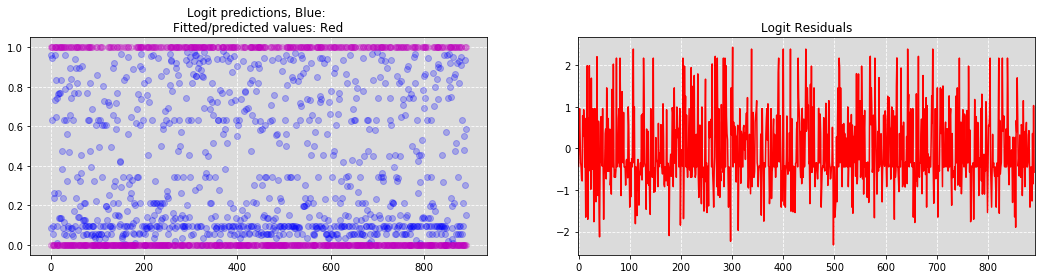

In [309]:
plt.figure(figsize=(18,4));
plt.subplot(121, facecolor="#DBDBDB")


ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

ax2 = plt.subplot(122, facecolor="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');


# Test Data

In [310]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [311]:
test.drop('Cabin', 1, inplace = True)

mean = int(round(test['Age'].mean()))
sd = int(round(test['Age'].std()))
test["Age"].fillna(randint(mean - sd, mean + sd), inplace=True)
test.loc[ test['Age'] <= 16, "Age"] = 0
test.loc[ (test['Age'] > 16) & (test['Age'] <= 32) , "Age"] = 1
test.loc[ (test['Age'] > 32) & (test['Age'] <= 48) , "Age"] = 2
test.loc[ (test['Age'] > 48) & (test['Age'] <= 64) , "Age"] = 3
test.loc[ df['Age'] > 64, "Age"] = 4
test['Age'] = test["Age"].astype(int)

test["Fsize"] = test["SibSp"] + test["Parch"] + 1
test["Fsize"] = test["SibSp"] + test["Parch"] 
test["Fsize"].loc[test["Fsize"] > 0] = 1
test["Fsize"].loc[test["Fsize"] == 0] = 0

test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare Title')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].map(title_mapping)
test['Title'].fillna(0, inplace=True)

test["Embarked"].fillna("S", inplace=True)

test["Survived"] = 1.1

C:\Users\bizet\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [312]:
y_test,x_test = dmatrices(formula, data=test, return_type='dataframe')

In [313]:
predict_result = Model.predict(x_test)

In [314]:
Model.score(x, y)

0.8204264870931538

In [315]:
Logit_Reg_Submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predict_result
})

In [316]:
Logit_Reg_Submission.to_csv("Logit_Reg_Submission.csv", index=False)